In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/income.csv')
df = df.rename(columns={'income >50K': 'income_50_k'})
df = df.rename(columns={'education-num': 'education_num'})
df.income_50_k = df.income_50_k.astype('category')
df.income_50_k = df.income_50_k.astype('category')
df['education'] = df['education'].astype('category')

y = df['income_50_k']
X = df.drop('income_50_k', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  object  
 2   education       32561 non-null  category
 3   education_num   32561 non-null  int64   
 4   marital-status  32561 non-null  object  
 5   occupation      30718 non-null  object  
 6   relationship    32561 non-null  object  
 7   race            32561 non-null  object  
 8   sex             32561 non-null  object  
 9   capital-gain    32561 non-null  int64   
 10  capital-loss    32561 non-null  int64   
 11  hours-per-week  32561 non-null  int64   
 12  native-country  31978 non-null  object  
 13  income_50_k     32561 non-null  category
dtypes: category(2), int64(5), object(7)
memory usage: 3.0+ MB


In [ ]:
df

,age,workclass,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_50_k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.

In [ ]:
y.value_counts()

,count
income_50_k,
0,24720
1,7841


In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
# Объединяем X и y для удобства
data = pd.concat([X, y], axis=1)

# Разделяем на классы
majority = data[data['income_50_k'] == 0]
minority = data[data['income_50_k'] == 1]

# Уменьшаем количество экземпляров класса 1
minority_downsampled = resample(minority,
                                replace=False,
                                n_samples=int(len(majority)*0.1),
                                random_state=42)

# Объединяем обратно
data_disbalanced = pd.concat([majority, minority_downsampled])

# Новые X и y
X_disbalanced = data_disbalanced.drop('income_50_k', axis=1)
y_disbalanced = data_disbalanced['income_50_k']

X_disbalanced = pd.get_dummies(X_disbalanced, drop_first=True)

In [ ]:
print(y_disbalanced.value_counts())

income_50_k
0    24720
1     2472
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

age                  0
workclass         1836
education            0
education_num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income_50_k          0
dtype: int64


In [ ]:
df_test_nan = df.copy()


In [ ]:
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df_drop.isnull().sum()) # пропусков н


# Удаление строк с пропусками
age               0
workclass         0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_50_k       0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_disbalanced, y_disbalanced, test_size=0.3, random_state=42)

# Обучаем модель
model = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9241235596960039

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      7442
           1       0.86      0.16      0.27       716

    accuracy                           0.92      8158
   macro avg       0.89      0.58      0.62      8158
weighted avg       0.92      0.92      0.90      8158



In [ ]:
unique, counts = np.unique(y_pred, return_counts=True) # получаем уникальные значения и их количество в предсказанных данных

dict(zip(unique, counts)) # данная ситуация называется переобучением. Модель очень хорошо обучилась на 0, настолько, что не может предсказать 1

{0: 8023, 1: 135}

#1. 5

In [ ]:
# Уменьшаем количество экземпляров класса 0
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

# Объединяем обратно
data_balanced = pd.concat([majority_downsampled, minority])

# Новые X и y
X_balanced = data_balanced.drop('income_50_k', axis=1)
y_balanced = data_balanced['income_50_k']

X_balanced = pd.get_dummies(X_balanced, drop_first=True)

In [ ]:
print(y_balanced.value_counts())

income_50_k
0    7841
1    7841
Name: count, dtype: int64


In [ ]:

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)

In [ ]:
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_bal))

Accuracy: 0.6180658873538789

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.93      0.71      2351
           1       0.82      0.31      0.44      2354

    accuracy                           0.62      4705
   macro avg       0.69      0.62      0.58      4705
weighted avg       0.69      0.62      0.58      4705



In [ ]:

unique, counts = np.unique(y_pred_bal, return_counts=True) # получаем уникальные значения и их количество в предсказанных данных

dict(zip(unique, counts)) # Текущая модель показывает неплохие результаты. Попробуем улучшить

{0: 3824, 1: 881}

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Убедимся, что данные не пустые
if not X_balanced.empty:
    # Выбираем числовые признаки
    numeric_features = X_balanced.select_dtypes(include=['float64', 'int64']).columns.tolist()

    if numeric_features:
        # Инициализируем scaler
        scaler = MinMaxScaler()

        # Применяем нормализацию
        X_balanced[numeric_features] = scaler.fit_transform(X_balanced[numeric_features])
    else:
        print("Нет числовых признаков для нормализации.")
else:
    print("Данные X_balanced пустые.")


In [ ]:
# Разделяем данные
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)

In [ ]:
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_bal)) # Дополнительно получили 1.57% точно

Accuracy: 0.8233793836344314

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      2351
           1       0.82      0.83      0.83      2354

    accuracy                           0.82      4705
   macro avg       0.82      0.82      0.82      4705
weighted avg       0.82      0.82      0.82      4705



In [ ]:

unique, counts = np.unique(y_pred_bal, return_counts=True) # получаем уникальные значения и их количество в предсказанных данных

dict(zip(unique, counts)) # Текущая модель показывает неплохие результаты. Попробуем улучшит

{0: 2302, 1: 2403}

# 2 Метрики качества классификаци

In [ ]:

# Разделяем данные
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Вычисляем матрицу ошибок (TP, FP, TN, FN)
conf_matrix = confusion_matrix(y_test_bal, y_pred_bal)
tn, fp, fn, tp = conf_matrix.ravel()

# Рассчитываем метрики
accuracy = accuracy_score(y_test_bal, y_pred_bal)
precision = precision_score(y_test_bal, y_pred_bal)
recall = recall_score(y_test_bal, y_pred_bal)
f1 = f1_score(y_test_bal, y_pred_bal)
roc_auc = roc_auc_score(y_test_bal, y_pred_bal)

# Генерируем classification_report
class_report = classification_report(y_test_bal, y_pred_bal, output_dict=True)

# Формируем результаты для наглядного вывода
results = {
    "True Negatives (TN)": tn,
    "False Positives (FP)": fp,
    "False Negatives (FN)": fn,
    "True Positives (TP)": tp,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "ROC-AUC": roc_auc,
}

# Округляем все значения в словаре до двух знаков после запятой и возвращаем в виде dict.items()
rounded_items = {k: round(v, 2) for k, v in results.items()}

In [ ]:
print(classification_report(y_test_bal, y_pred_bal))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2351
           1       0.82      0.83      0.83      2354

    accuracy                           0.82      4705
   macro avg       0.82      0.82      0.82      4705
weighted avg       0.82      0.82      0.82      4705



In [ ]:
conf_matrix

array([[1911,  440],
       [ 391, 1963]])

In [ ]:

rounded_items

{'True Negatives (TN)': 1911,
 'False Positives (FP)': 440,
 'False Negatives (FN)': 391,
 'True Positives (TP)': 1963,
 'Accuracy': 0.82,
 'Precision': 0.82,
 'Recall': 0.83,
 'F1-score': 0.83,
 'ROC-AUC': 0.82}

#3. Задача мультиклассовой классфикации

In [ ]:
y = df['education_num']

X = df.drop(['education_num', 'income_50_k'], axis=1)


In [ ]:

# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как category
X_original = X.copy()
# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True) # drop_fi


In [ ]:
X

,age,workclass,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,39,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,...,False,False,False,True,False,False,False,False,False,False
1,50,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,...,False,False,False,True,False,False,False,False,False,False
2,38,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,...,False,False,False,False,False,True,False,False,False,False
3,53,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,...,False,False,False,False,False,False,False,False,False,False
4,28,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,...,False,True,False,False,False,False,False,False,False,False
32557,40,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,...,False,False,False,False,False,True,False,False,False,False
32558,58,Private,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,...,False,False,False,False,False,True,False,False,False,False
32559,22,Private,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,...,False,False,False,False,False,True,False,False,False,False


# 3.1 Алгоритм дерева принятия решений

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Преобразуем категориальные переменные в числовые
X_encoded = pd.get_dummies(X, drop_first=True)

# Разделяем данные
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Обучаем модель
tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)
tree_model.fit(X_train_multi, y_train_multi)

# Предсказания
y_pred_multi = tree_model.predict(X_test_multi)


In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report:\n", classification_report(y_test_multi, y_pred_multi))


Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00       103
           4       1.00      1.00      1.00       203
           5       1.00      1.00      1.00       160
           6       0.41      1.00      0.58       284
           7       1.00      1.00      1.00       344
           8       0.00      0.00      0.00       140
           9       1.00      1.00      1.00      3182
          10       1.00      1.00      1.00      2196
          11       1.00      1.00      1.00       408
          12       1.00      1.00      1.00       316
          13       1.00      1.00      1.00      1583
          14       1.00      1.00      1.00       509
          15       1.00      1.00      1.00       169
          16       0.00      0.00      0.00       117

    accuracy                           0.96      9769
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
accuracy_score(y_test_multi, y_pred_multi)

0.9575186815436585

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test_multi, y_pred_multi) # ну такое

0.6875

#Важность признаков

Несоответствие размеров: 95 признаков в модели, 26 столбцов в X.


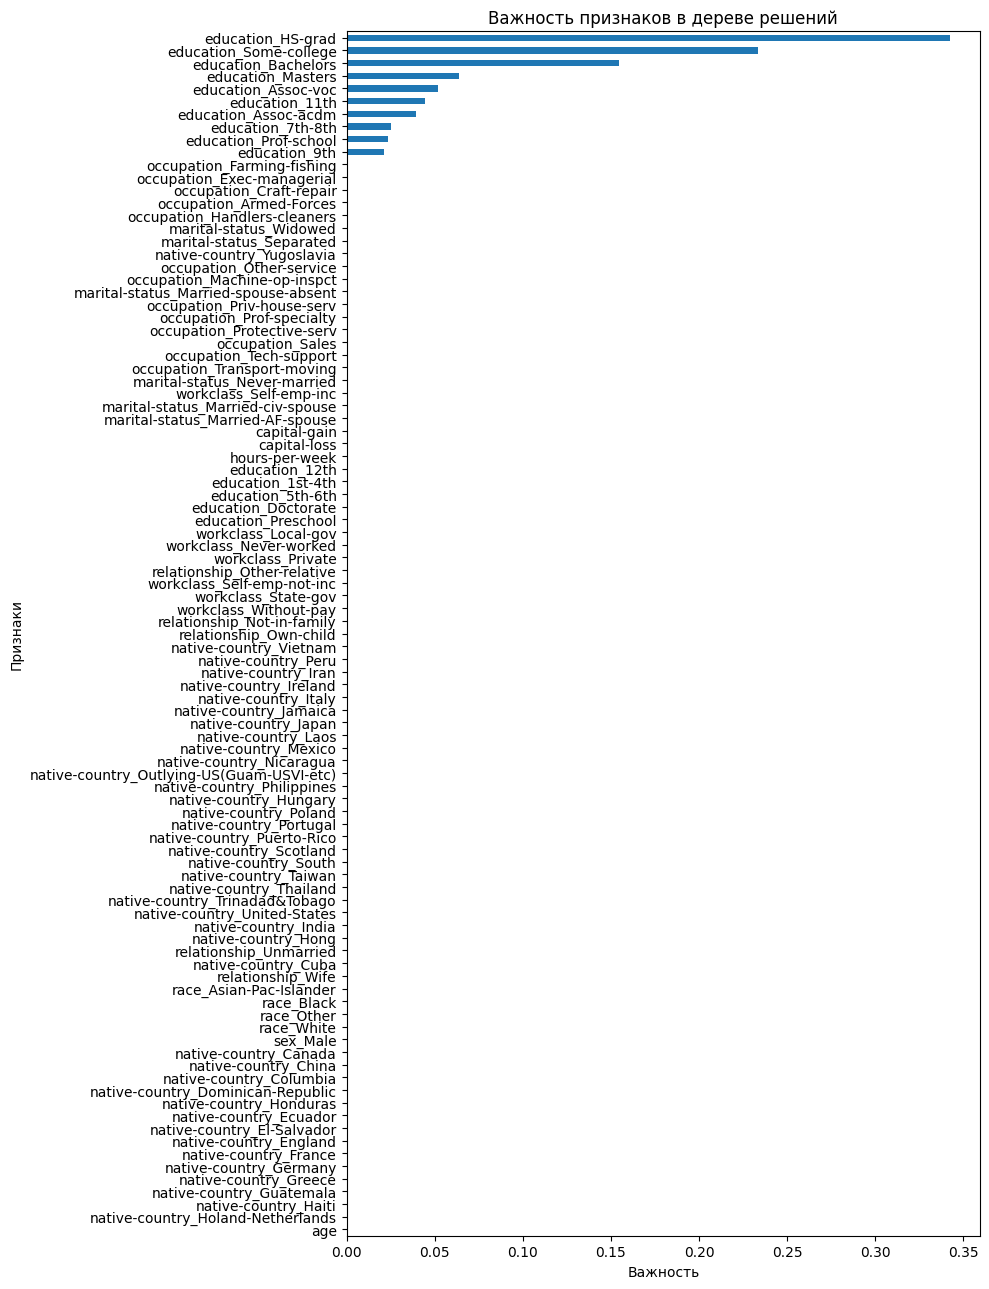

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Проверяем размеры
if len(tree_model.feature_importances_) == len(X.columns):
    # Если длины совпадают, продолжаем
    feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
else:
    print(f"Несоответствие размеров: {len(tree_model.feature_importances_)} признаков в модели, {len(X.columns)} столбцов в X.")
    # Используем другие имена признаков, если они есть
    try:
        feature_names = tree_model.feature_names_in_  # У большинства моделей sklearn есть этот атрибут
        feature_importances = pd.Series(tree_model.feature_importances_, index=feature_names)
    except AttributeError:
        raise ValueError("Не удалось сопоставить имена признаков. Проверьте входные данные.")

# Строим график
feature_importances.sort_values().plot(kind='barh', figsize=(10, 13))
plt.title('Важность признаков в дереве решений')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()


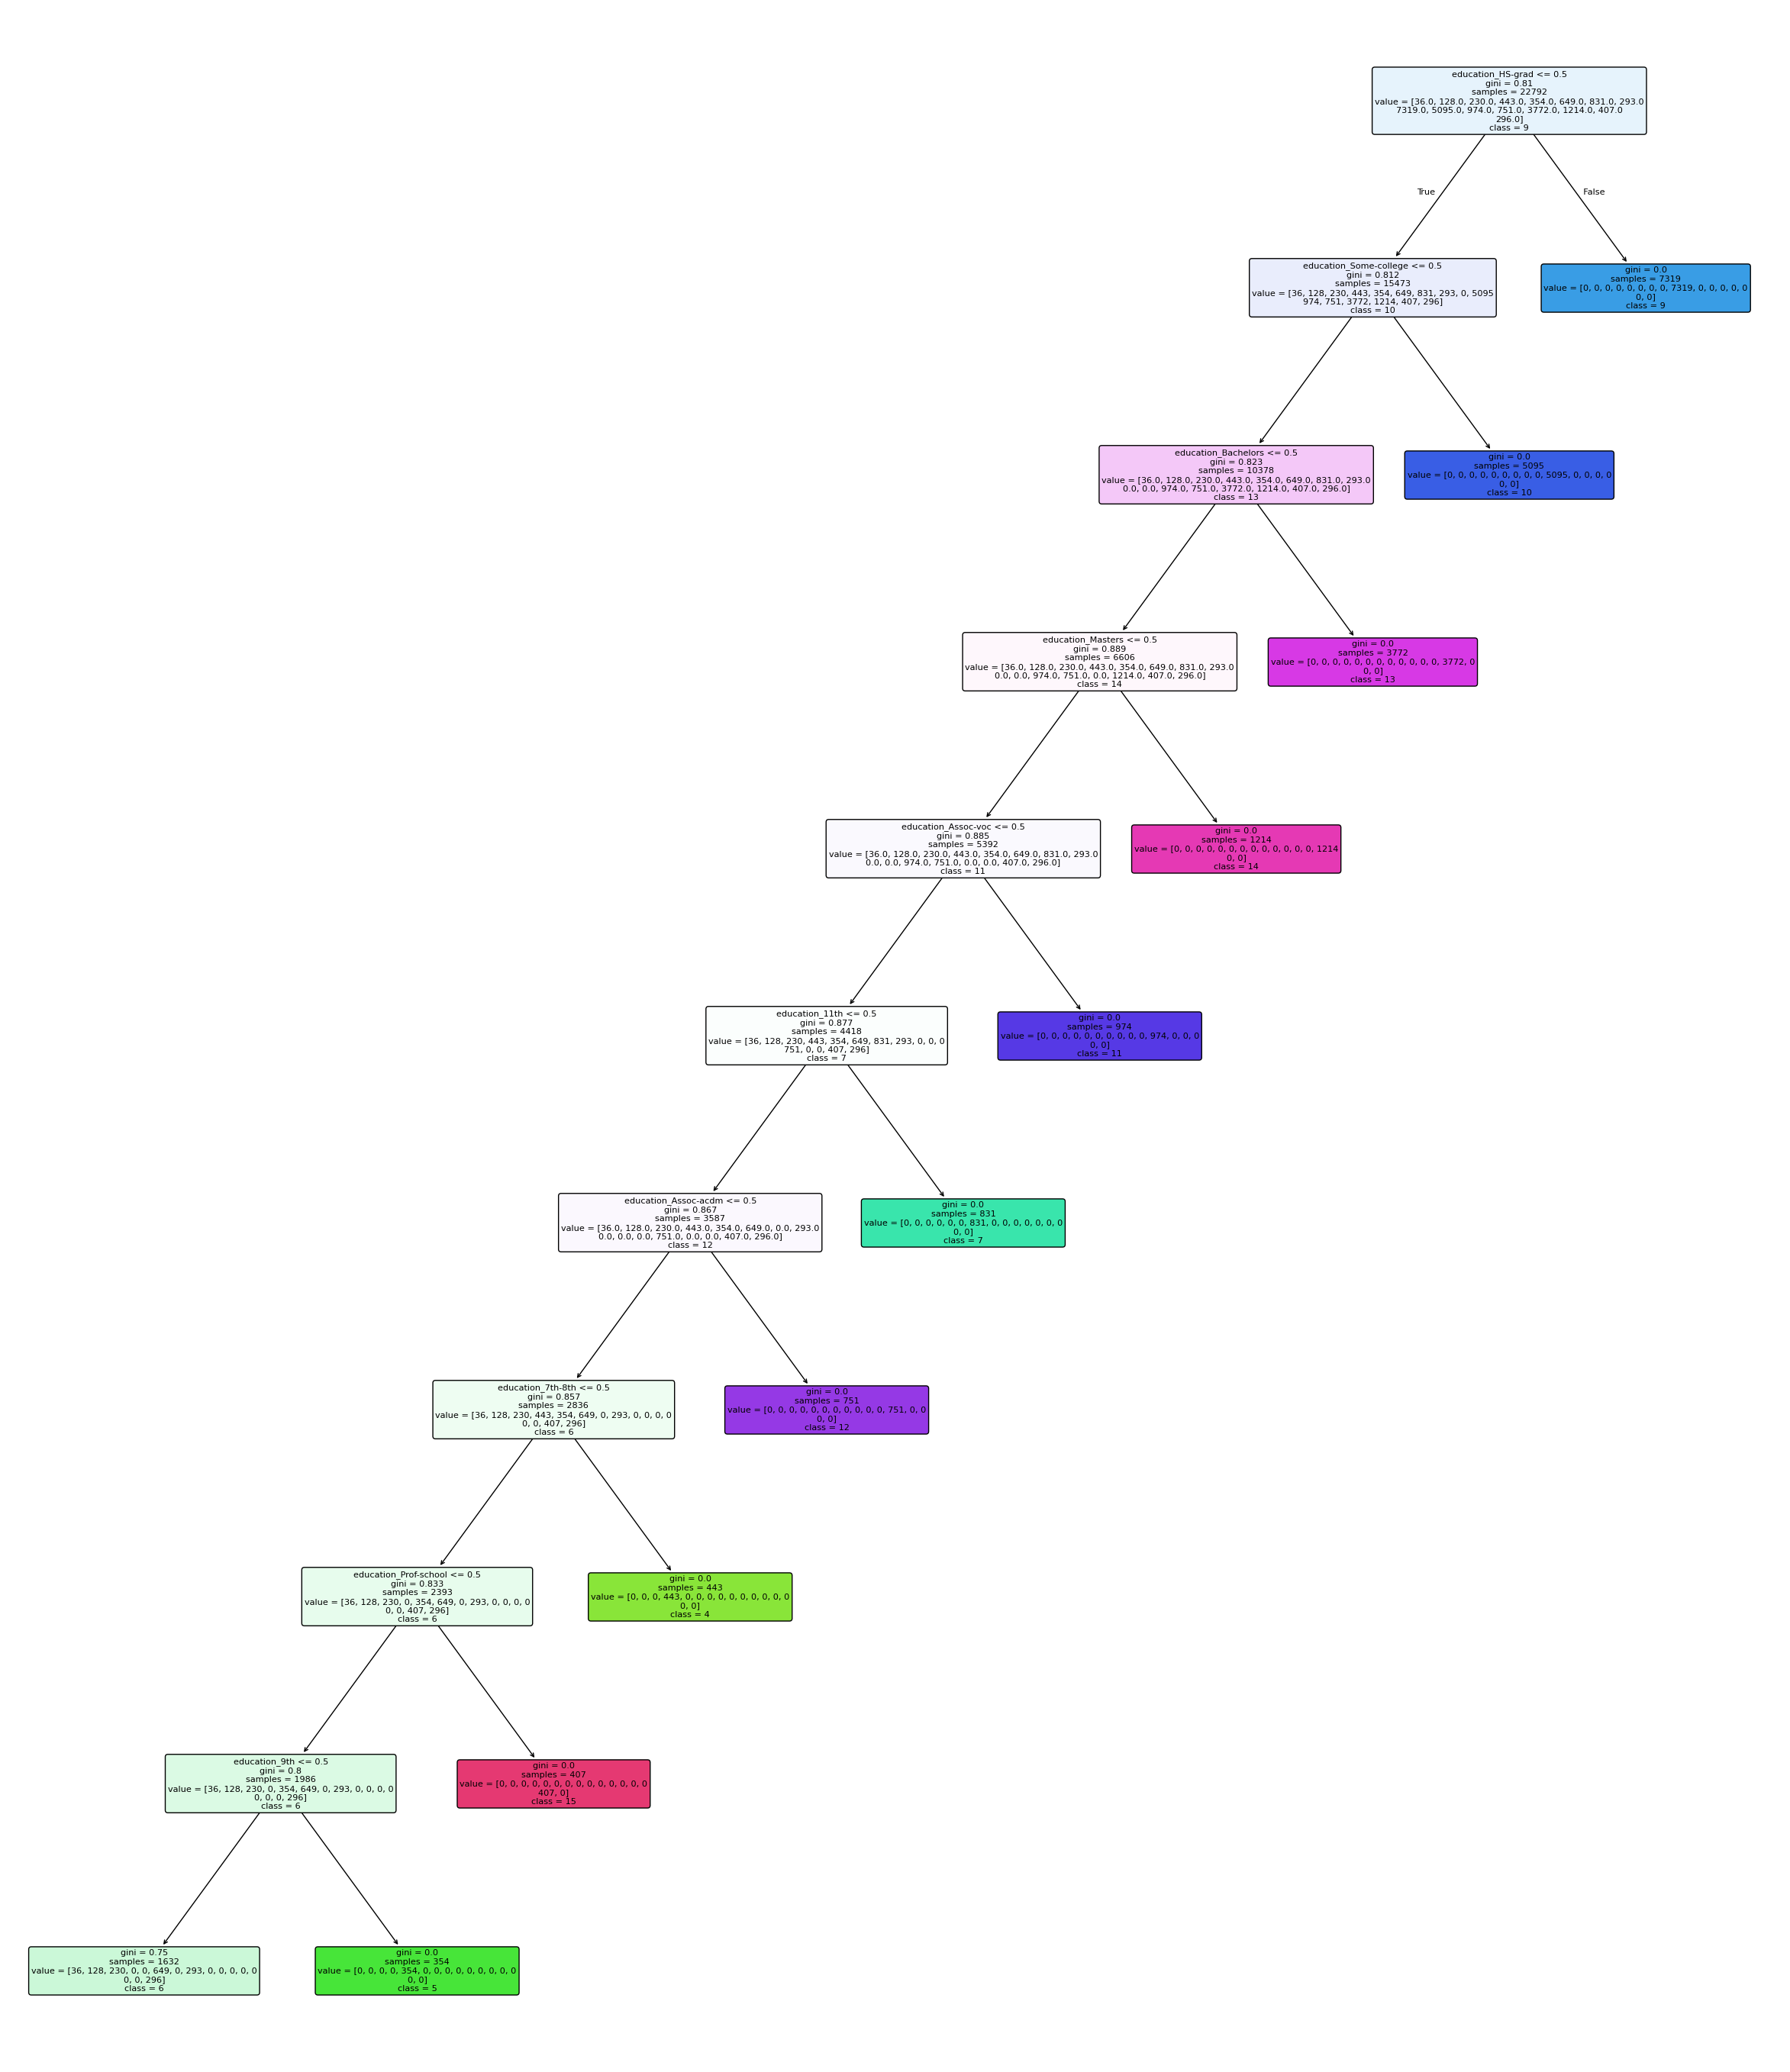

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Проверяем наличие признаков в модели
try:
    feature_names = tree_model.feature_names_in_  # Попробуем взять имена признаков из модели
except AttributeError:
    feature_names = X.columns  # Если их нет, используем столбцы из X

# Проверяем соответствие длины признаков
if len(feature_names) != len(tree_model.feature_importances_):
    raise ValueError(
        f"Несоответствие числа признаков: "
        f"модель ожидает {len(tree_model.feature_importances_)} признаков, "
        f"но передано {len(feature_names)}."
    )

# Визуализируем дерево решений
plt.figure(figsize=(30, 35))  # Оптимальный размер графика
plot_tree(
    tree_model,
    feature_names=feature_names,
    class_names=[str(item) for item in sorted(y.unique())],
    filled=True,
    rounded=True
)
plt.show()
